In [1]:
import sys
import os
import pandas as pd
###There is something you need to change before using
# change the path where jupyter access
Path=r'C:\Users\Simu\Desktop\BRISTOL\DSMP'
#where change the path of data in "additional folder"
path_add_folder=r'C:\Users\Simu\Desktop\BRISTOL\DSMP\925 Data additional data'
#where change the path of data in "Rise data"
path_rise_folder=r'C:\Users\Simu\Desktop\BRISTOL\DSMP\Ceara Rise data'
sys.path.append(Path)
#merge name of excel into list files
files_add = [file for file in os.listdir(path_add_folder) 
             if file.endswith('.csv') or file.endswith('.xlsx')]
files_rise = [file for file in os.listdir(path_rise_folder) 
             if file.endswith('.csv') or file.endswith('.xlsx')]
def read_all_excel_from_folder(path,files):
    #initialize a library to storage
    list=[]
    for file in files:
        #join the path of excel to the path of folder
        file_path = os.path.join(path,file)
        #get data with panda
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        else:
            df = pd.read_excel(file_path)
        #get name of excel without exthension
        file_name_without_extension = os.path.splitext(file)[0]
        #storage data in library with name of excel to index
        list.append(df)
    return list

##storage data from additon_folder
excels_add= read_all_excel_from_folder(path_add_folder,files_add)
#example of indexing
print(excels_add[0])
#because the name of excel is complex so we read the name of file with number
#but it is ok to index with(excel_add[files_add.index('name')])
print(excels_add[files_add.index(files_add[0])])

##storage fata from rise_folder
excels_rise= read_all_excel_from_folder(path_rise_folder,files_rise)
print(excels_rise[0])


      Unnamed: 0  Object.ID    Area..µm².  Mean..Gray.Intensity.Value.  \
0              1         10  71960.336636                   115.860406   
1              2         11  71012.345738                   102.445560   
2              3         12  43433.638042                   139.667000   
3              4         13  47138.629994                   115.107011   
4              5         14  48938.942984                   141.558024   
...          ...        ...           ...                          ...   
2154        2155       7211  39328.576537                    97.571650   
2155        2156       7272  28596.275908                   120.901156   
2156        2157       7287  64680.810196                   132.147640   
2157        2158       7288  45233.951033                   123.688137   
2158        2159       7629  79779.087257                   166.323558   

      Shape.Factor  Min..Diameter...µm.  Max..Diameter...µm.  \
0         0.662955           246.498520        

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    ***I will change name of columns to make sure every excel have same columns , take out blank columns identified by panda and take out last three lines in excel of file"rise" because they are not data about specific samples(you can see why in details by opening excels in 'rise' file)
    add columns in excel which miss "area" and "Perimeter (µm)"
    rearrange columns by letters
    rename colimns
    add columns for indexing age

In [3]:
import re
#get value of attributes from filenames
def pre_filenames(filenames):
    name_attribute = []
    for filename in filenames:
        # take out extension and "measure ...."
        filename = os.path.splitext(filename)[0]
        filename = filename.replace("Count and Measure of", "").strip()
        # get elements of number and letter
        elements = re.findall(r'\d+\.\d+|\d+|[a-zA-Z]', filename)
        # take out "-"
        parsed_elements=[]
        for element in elements:
            parsed_elements.extend(re.split(r'[-]', element))
            
        while len(parsed_elements) < 7:
            parsed_elements.append(None)  # Fill with `None` if missing

        name_attribute.append(parsed_elements)
    return name_attribute
# function to reneme columns
def rename_columns(excels):
    new_columns = ['Area (µm²)', 
                   'Elongation', 
                   'Max (Diameter) (µm)',
                   'Mean (Diameter) (µm)', 
                   'Mean (Gray Intensity Value)',
                   'Min (Diameter) (µm)', 
                   'Object ID', 
                   'Perimeter (µm)', 
                   'Shape Factor',
                   'Sphericity']
    excels = [excel.rename(columns=dict(zip(excel.columns,new_columns))) for excel in excels]
    return excels
def add_columns(excels,name_lists):
    excels=[excel.assign(
        SITE = name[0],
        HOLE = name[1],
        CORE = name[2],
        CORE_TYPE=name[3],
        SECTION=name[4],
        TOP_DEPTH=name[5],
        BOTTOM_DEPTH=name[6]
        ) for excel,name in zip(excels,name_lists)]
    return excels

def drop_columns(excels,columns_name):
    return [df.drop(columns=[columns_name], errors='ignore') for df in excels]

#get name of files
pre_filenames_add=pre_filenames(files_add)
#print(pre_filenames_add)
pre_filenames_rise=pre_filenames(files_rise)


for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        excels_rise[i]["Area (µm²)"]=pd.NA
        excels_rise[i]["Perimeter (µm)"]=pd.NA
#test whether they have same number of columns
for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        print(excels_rise[i].columns)
        print(excels_rise[0].columns)
        print(i)
        
#drop unuseful column in "additional" excel
excels_add_name= drop_columns(excels_add, 'Unnamed: 0')
#drop unuseful column in  "rise" excel
excels_rise_name= drop_columns(excels_rise, 'Statistics')

#rearrange columns by letters
excels_add_name_re= [excel[sorted(excel.columns)] for excel in excels_add_name ]
excels_rise_name_re = [excel[sorted(excel.columns)] for excel in excels_rise_name]





#rename columns
excels_add_columns_rename= rename_columns(excels_add_name_re)

excels_rise_columns_rename= rename_columns(excels_rise_name_re)
excels_rise_columns_rename= [excel.iloc[:-3] for excel in excels_rise_columns_rename]

#add columns which is used to index age
pre_filenames_rise[253][-1]=84.5
pre_filenames_rise[253].append("86.5")
excels_add_columns_index= add_columns(excels_add_columns_rename,pre_filenames_add)
excels_rise_columns_index= add_columns(excels_rise_columns_rename,pre_filenames_rise)
print(excels_rise_columns_index[3])
excels_add_final = excels_add_columns_index
excels_rise_final = excels_rise_columns_index
print(excels_add_final[3].columns)
print(excels_rise_final[3].columns)
print(len(excels_add_final))
print(len(excels_rise_final))
for i in range(len(excels_add_final)):
    excels_add_final[i]['ID']=i
print(excels_add_final[1])
for j in range(len(excels_rise_final)):
    excels_rise_final[j]['ID']=j+len(excels_add_final)
print(excels_rise_final[-1]['ID'])

     Area (µm²)  Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0           NaN    1.002705           808.056788            800.516763   
1           NaN    1.035013           766.746549            749.412318   
2           NaN    1.285835           722.764922            634.259516   
3           NaN    1.014340           710.957951            699.943969   
4           NaN    1.009522           707.366881            699.769394   
...         ...         ...                  ...                   ...   
2821        NaN    1.124373           167.730416            155.094441   
2822        NaN    1.174303           164.550159            150.578658   
2823        NaN    1.225468           157.903847            141.446890   
2824        NaN    1.092033           156.390559            142.665983   
2825        NaN    1.085265           155.779621            148.171484   

      Mean (Gray Intensity Value)  Min (Diameter) (µm)  Object ID  \
0                      110.419611         

    ***Merge excels in excels in 'rise' file and 'additional' file.
    Alse try to merge samples excels with 'Mastersheet'file to see whether it can add 'age' columns to samples excels.

In [4]:
Master_sheet_stay=pd.read_excel(r"C:\Users\Simu\Desktop\BRISTOL\DSMP\925_Mastersheet (1).xlsx",engine='openpyxl', header=1)  # Adjust header row
# Strip spaces and newlines from column names
Master_sheet_stay.columns = Master_sheet_stay.columns.str.strip().str.replace("\n", "_", regex=True)

print(Master_sheet_stay.columns)  # Check if columns are correct


Index(['Unnamed: 0', 'EXPEDITION', 'SITE', 'HOLE', 'CORE', 'CORE_TYPE',
       'SECTION', 'CC', 'TOP_DEPTH', 'BOTTOM_DEPTH', 'MBSF_TOP', 'MCD_TOP',
       'Age (Ma)', 'Splits', 'Size.Mean.Area', 'Unnamed: 15',
       'Size.Mean.DiameterMean', 'Size.Mean.DiameterMin',
       'Size.Mean.DiameterMax', 'Size.Mean.Sphericity',
       'Size.Mean.ShapeFactor', 'Size.Median.Area', 'Size.Median.DiameterMean',
       'Size.Median.DiameterMin', 'Size.Median.DiameterMax',
       'Size.Median.Sphericity', 'Size.Median.ShapeFactor', 'Size.sd.Area',
       'Size.sd.DiameterMean', 'Size.sd.DiameterMin', 'Size.sd.DiameterMax',
       'Size.sd.Sphericity', 'Size.sd.ShapeFactor', 'Size.95.Area',
       'Size.95.DiameterMean', 'Size.95.DiameterMin', 'Size.95.DiameterMax',
       'Size.95.Sphericity', 'Size.95.ShapeFactor', 'Size.9.Area',
       'Size.9.DiameterMean', 'Size.9.DiameterMin', 'Size.9.DiameterMax',
       'Size.9.Sphericity', 'Size.9.ShapeFactor', 'Size.skewness.Area',
       'Size.skewness.Di

In [5]:

Master_sheet =Master_sheet_stay.iloc[:-3]
# make suer type is same
def standardize_types(df):
    # Convert only numeric values, replacing non-numeric with NaN
    df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
    df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
    df["HOLE"] = df["HOLE"].astype(str)  # Keep as string
    df["CORE_TYPE"] = df["CORE_TYPE"].astype(str)
    df["SECTION"] = pd.to_numeric(df["SECTION"], errors='coerce')
    df["TOP_DEPTH"] = pd.to_numeric(df["TOP_DEPTH"], errors='coerce')
    df["BOTTOM_DEPTH"] = pd.to_numeric(df["BOTTOM_DEPTH"], errors='coerce')
    return df
print(Master_sheet.dtypes)
print(excels_rise_final[3].dtypes)
print(excels_add_final[2].dtypes)
Master_sheet = standardize_types(Master_sheet)
excels_rise_final_st = [standardize_types(df) for df in excels_rise_final]
excels_add_final_st = [standardize_types(df) for df in excels_add_final]
# drop lines where age is empty
key_columns = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH", "Age (Ma)"]
key_index=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
mastersheet_filtered = Master_sheet[key_columns].dropna(subset=["Age (Ma)"])
excels_rise_final_std = [excel_rise_final_st.dropna(subset=key_index) for excel_rise_final_st in excels_rise_final_st ]
excels_add_final_std = [excel_add_final_st.dropna(subset=key_index) for excel_add_final_st in excels_add_final_st] 
print(excels_rise_final_st[3])

# merge function which wil be used by map
def add_age_info(df):
    df = df.copy()  
    for col in ["HOLE", "CORE_TYPE"]:
        df[col] = df[col].astype(str)
    merged_df = df.merge(mastersheet_filtered, 
                         on=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"], 
                         how="left")
    return merged_df

# storage with age
excels_add_final_updated = [add_age_info(df) for df in excels_add_final_st ]
print(excels_add_final_updated[-1]['ID'])
excels_rise_final_updated = [add_age_info(df) for df in excels_rise_final_st]
print(excels_rise_final_updated[-1]['ID'])
print(excels_rise_final_updated[0]['ID'])
#merge excels of samples
excel_add_whole = pd.concat(excels_add_final_updated,ignore_index=True,axis=0)
print(excel_add_whole['ID'].nunique())
excel_rise_whole =pd.concat(excels_rise_final_updated,ignore_index=True,axis=0)
print(excel_rise_whole['ID'].nunique())
samples=pd.concat([excel_add_whole,excel_rise_whole],ignore_index=True,axis=0)
print(samples['ID'].nunique())
samples.to_csv("samples.csv", index=False)

Unnamed: 0             float64
EXPEDITION             float64
SITE                    object
HOLE                    object
CORE                   float64
                        ...   
Notes                   object
fragments              float64
whole.tests            float64
splits                 float64
fragmentation.index    float64
Length: 71, dtype: object
Area (µm²)                      object
Elongation                     float64
Max (Diameter) (µm)            float64
Mean (Diameter) (µm)           float64
Mean (Gray Intensity Value)    float64
Min (Diameter) (µm)            float64
Object ID                      float64
Perimeter (µm)                  object
Shape Factor                   float64
Sphericity                     float64
SITE                            object
HOLE                            object
CORE                            object
CORE_TYPE                       object
SECTION                         object
TOP_DEPTH                       object
BOTTOM_DE

C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

     Area (µm²)  Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0          <NA>    1.002705           808.056788            800.516763   
1          <NA>    1.035013           766.746549            749.412318   
2          <NA>    1.285835           722.764922            634.259516   
3          <NA>    1.014340           710.957951            699.943969   
4          <NA>    1.009522           707.366881            699.769394   
...         ...         ...                  ...                   ...   
2821       <NA>    1.124373           167.730416            155.094441   
2822       <NA>    1.174303           164.550159            150.578658   
2823       <NA>    1.225468           157.903847            141.446890   
2824       <NA>    1.092033           156.390559            142.665983   
2825       <NA>    1.085265           155.779621            148.171484   

      Mean (Gray Intensity Value)  Min (Diameter) (µm)  Object ID  \
0                      110.419611         

C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserW

0       551
1       551
2       551
3       551
4       551
       ... 
2013    551
2014    551
2015    551
2016    551
2017    551
Name: ID, Length: 2018, dtype: int64


C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(mastersheet_filtered,
C:\Users\Simu\AppData\Local\Temp\ipykernel_26740\3025006923.py:32: UserW

0       863
1       863
2       863
3       863
4       863
       ... 
2954    863
2955    863
2956    863
2957    863
2958    863
Name: ID, Length: 2959, dtype: int64
0       552
1       552
2       552
3       552
4       552
       ... 
3129    552
3130    552
3131    552
3132    552
3133    552
Name: ID, Length: 3134, dtype: int64
552
312
864


In [6]:
samples["key"] = samples[["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]].astype(str).agg("_".join, axis=1)
#set columns which used to group
group_cols = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
question_one_data = samples.groupby(group_cols).agg({
    "Max (Diameter) (µm)": lambda x: x.quantile(0.95),
    "Elongation": lambda x: x.quantile(0.95),
    "Age (Ma)": "first",  
    "Min (Diameter) (µm)": lambda x: x.quantile(0.05),
    "Shape Factor": "mean",
    "Sphericity":"mean"
    
}).reset_index()
question_one_data = question_one_data.copy().dropna(subset=["Age (Ma)",'Max (Diameter) (µm)','Elongation', "Sphericity", "Shape Factor","Min (Diameter) (µm)"])
print(question_one_data)
question_one_data.to_csv("question_one_data.csv", index=False)

      SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  \
1    925.0    B   3.0         H      1.0      115.0         116.0   
2    925.0    B   3.0         H      2.0       54.0          56.0   
3    925.0    B   3.0         H      2.0       94.0          96.0   
4    925.0    B   3.0         H      2.0      121.0         123.0   
5    925.0    B   3.0         H      2.0      125.0         127.0   
..     ...  ...   ...       ...      ...        ...           ...   
794  925.0    D  15.0         H      2.0       40.0          42.0   
795  925.0    D  15.0         H      2.0       85.0          87.0   
796  925.0    D  15.0         H      3.0       30.0          32.0   
797  925.0    D  15.0         H      3.0       65.0          67.0   
798  925.0    D  15.0         H      3.0      115.0         117.0   

     Max (Diameter) (µm)  Elongation  Age (Ma)  Min (Diameter) (µm)  \
1             648.942402    1.437448  0.434964           142.448367   
2             573.556717    1

### Trying modified code by Cai on 15th Feb

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun


Shape of data: (768, 13)

Missing Values:
 SITE                   0
HOLE                   0
CORE                   0
CORE_TYPE              0
SECTION                0
TOP_DEPTH              0
BOTTOM_DEPTH           0
Max (Diameter) (µm)    0
Elongation             0
Age (Ma)               0
Min (Diameter) (µm)    0
Shape Factor           0
Sphericity             0
dtype: int64

Number of duplicate rows: 0

Summary Statistics:
         SITE        CORE     SECTION   TOP_DEPTH  BOTTOM_DEPTH  \
count  768.0  768.000000  768.000000  768.000000    768.000000   
mean   925.0    6.196615    3.787760   74.285156     76.080729   
std      0.0    3.638006    1.349298   43.350134     43.346471   
min    925.0    1.000000    1.000000    0.000000      2.000000   
25%    925.0    3.000000    3.000000   35.750000     37.000000   
50%    925.0    6.000000    4.000000   75.500000     77.000000   
75%    925.0    8.000000    5.000000  112.000000    114.000000   
max    925.0   15.000000    7.000000  1

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

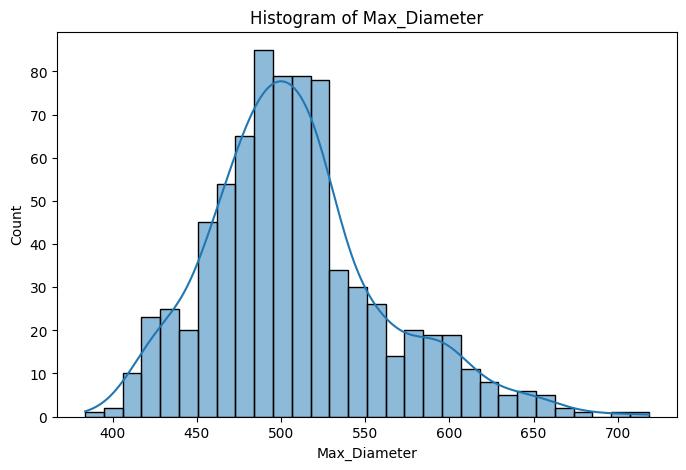

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

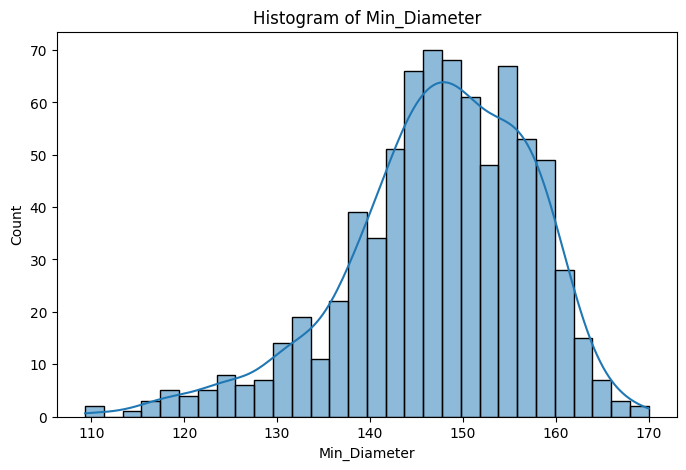

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

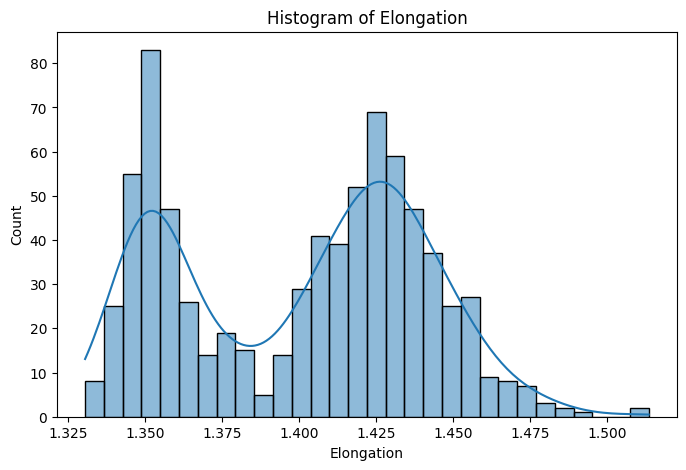


Column: Max_Diameter
Lower bound: 389.03, Upper bound: 618.13
Number of outliers: 30
Example outliers:
    SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  Max_Diameter  \
8    925    C     1         H        2          6             8    658.789072   
13   925    C     1         H        2         69            71    621.924639   
23   925    C     1         H        3         68            69    629.001547   
27   925    C     1         H        3        119           120    648.534296   
28   925    C     1         H        3        125           127    650.740221   

    Elongation    Age_Ma  Min_Diameter  Shape Factor  Sphericity    Age_Group  
8     1.439459  0.036821    157.928737      0.793099    0.663205  0.01-0.62MA  
13    1.429319  0.050982    159.760933      0.810316    0.685280  0.01-0.62MA  
23    1.438771  0.095250    147.040468      0.775499    0.657449  0.01-0.62MA  
27    1.414270  0.108333    160.339177      0.799498    0.670208  0.01-0.62MA  
28    1.4

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

file_path = "C:/Users/Simu/Documents/Github/Data-Science-Mini-Project/question_one_data.csv"
save_path = "C:/Users/Simu/Documents/Github/Data-Science-Mini-Project/plots/"
os.makedirs(save_path, exist_ok=True)
df = pd.read_csv(file_path) #, sheet_name='Sheet1')


print("\nShape of data:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())

df.rename(columns={
    "Age (Ma)": "Age_Ma",
    "Max (Diameter) (µm)": "Max_Diameter",
    "Min (Diameter) (µm)": "Min_Diameter",
    "Elongation": "Elongation"
}, inplace=True)

df_sorted = df.sort_values(by="Age_Ma", ascending=True).reset_index(drop=True)

# divid the data into two groups
df_sorted["Age_Group"] = pd.qcut(df_sorted["Age_Ma"], q=5, labels=[
    "0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"
])

# calculate the gap of data
age_label = df_sorted.groupby("Age_Group")["Age_Ma"].agg(["min", "max"])
age_label["Interval"] = age_label["max"] - age_label["min"]
print("\nLabeled Age Group Time Intervals (Million Years, Ma):")
print(age_label)


selected_cols = ["Max_Diameter", "Min_Diameter", "Elongation"]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

for col in selected_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_sorted[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.savefig(f"{save_path}Histogram_{col}.png", dpi=300)
    plt.show()

# outliers
def detect_outliers_iqr(df, cols, factor=1.5):
    outliers_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "count": outlier_mask.sum(),
            "outliers": df.loc[outlier_mask]
        }
    return outliers_info

iqr_outliers = detect_outliers_iqr(df_sorted, selected_cols)
for col, info in iqr_outliers.items():
    print(f"\nColumn: {col}")
    print(f"Lower bound: {info['lower_bound']:.2f}, Upper bound: {info['upper_bound']:.2f}")
    print(f"Number of outliers: {info['count']}")
    print(f"Example outliers:\n{info['outliers'].head()}")
    
def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

cleaned_data = remove_outliers_iqr(df_sorted, selected_cols)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

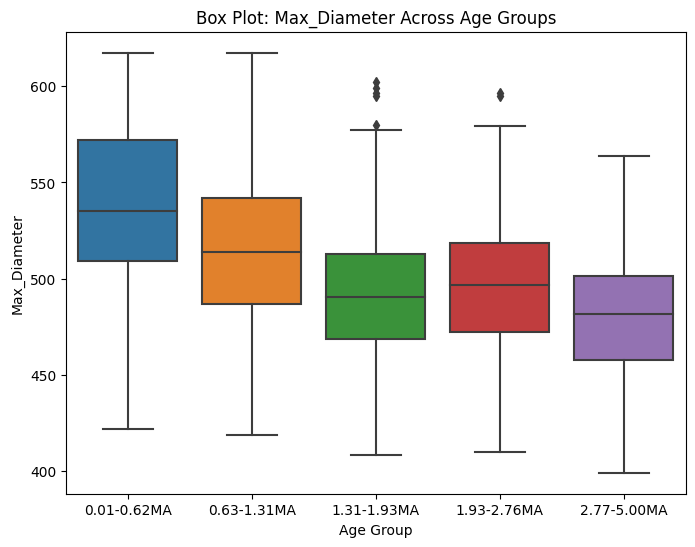

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

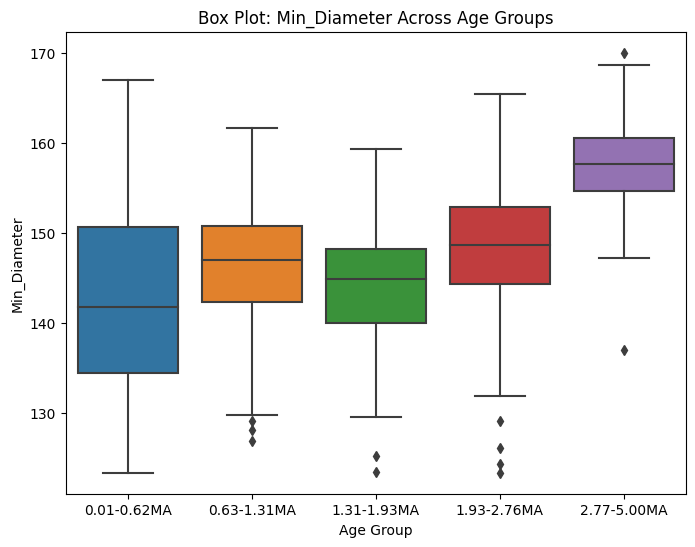

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

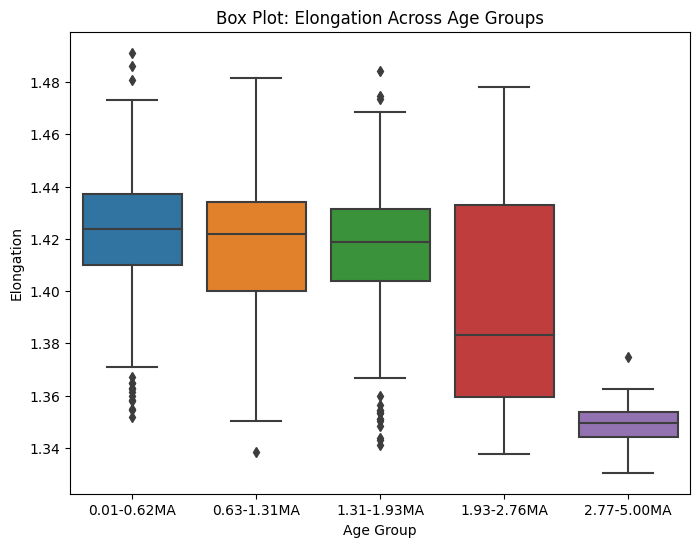

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

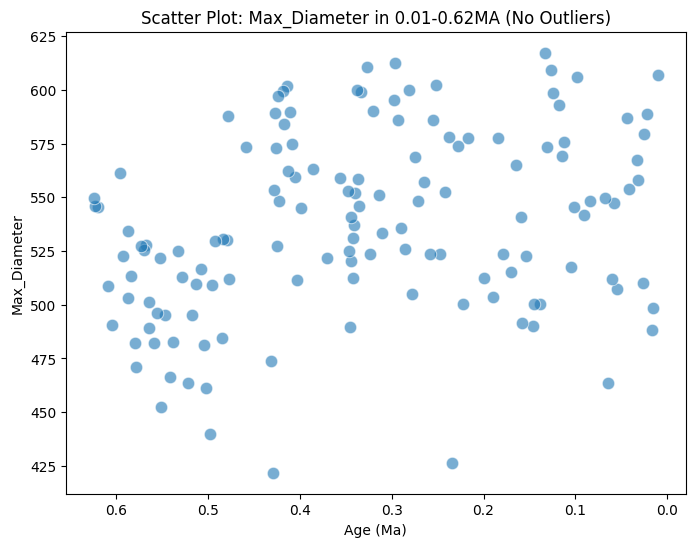

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

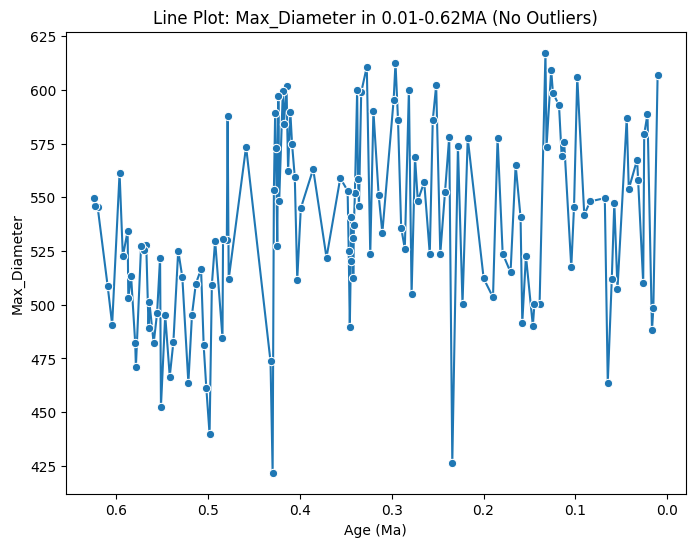

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

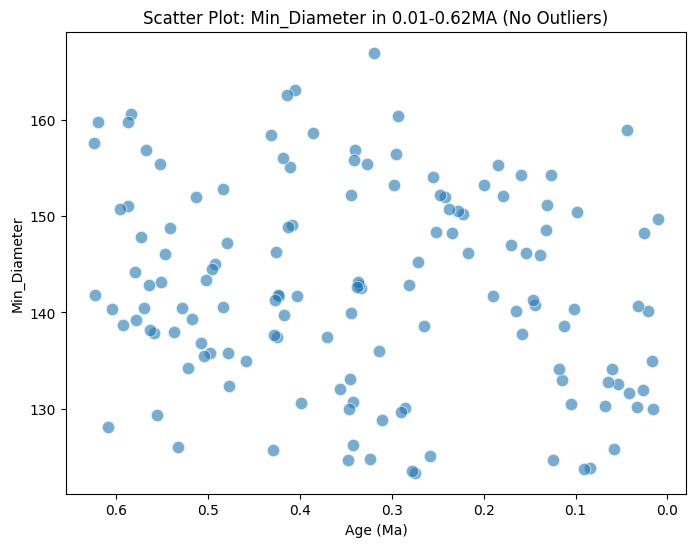

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

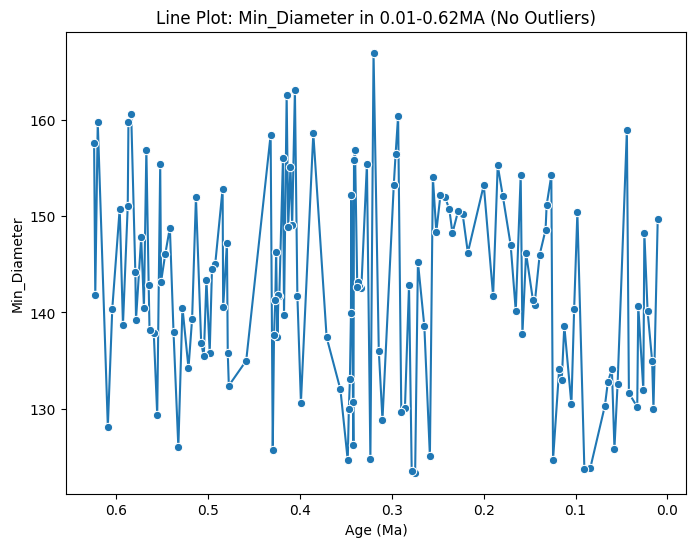

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

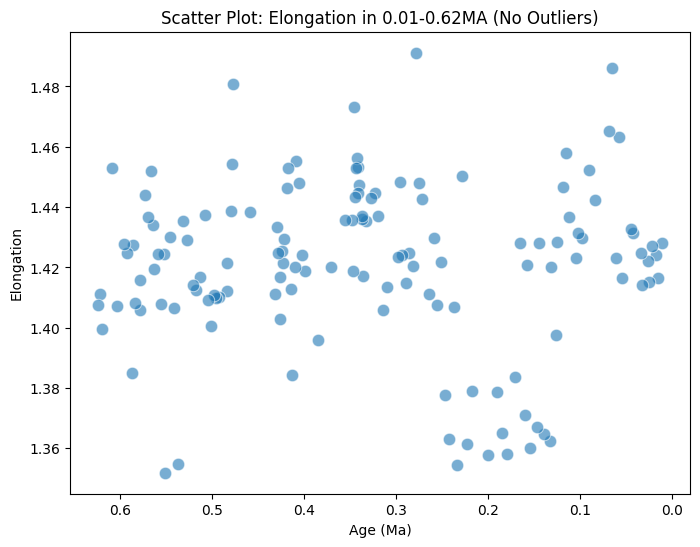

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

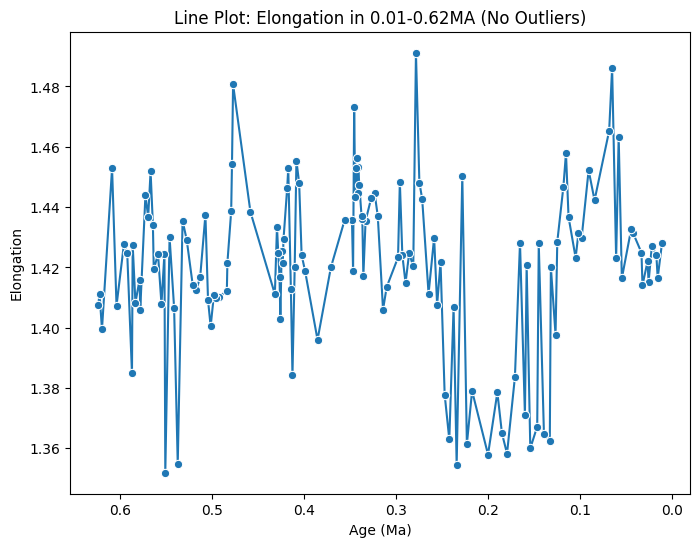

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

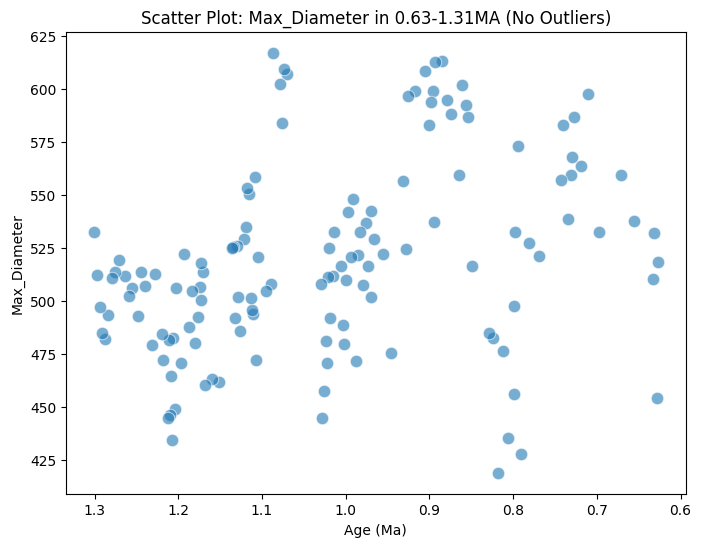

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

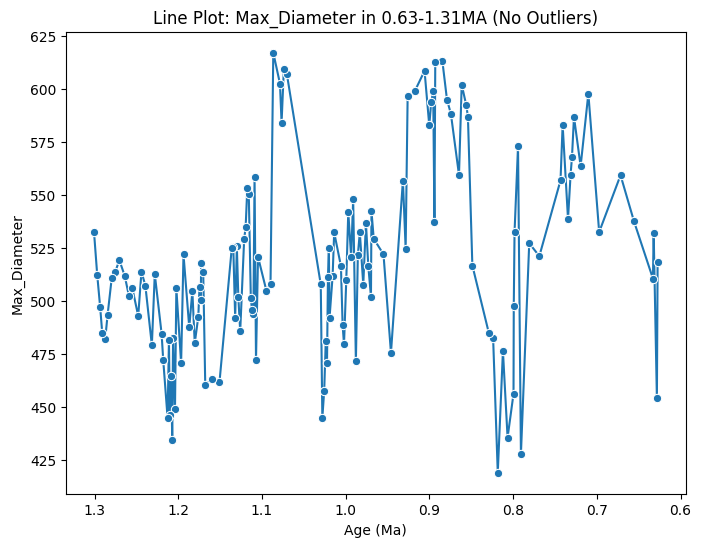

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

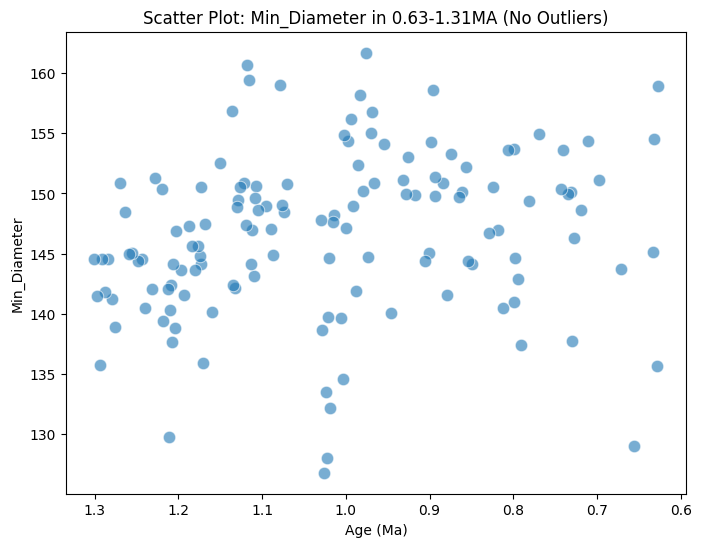

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

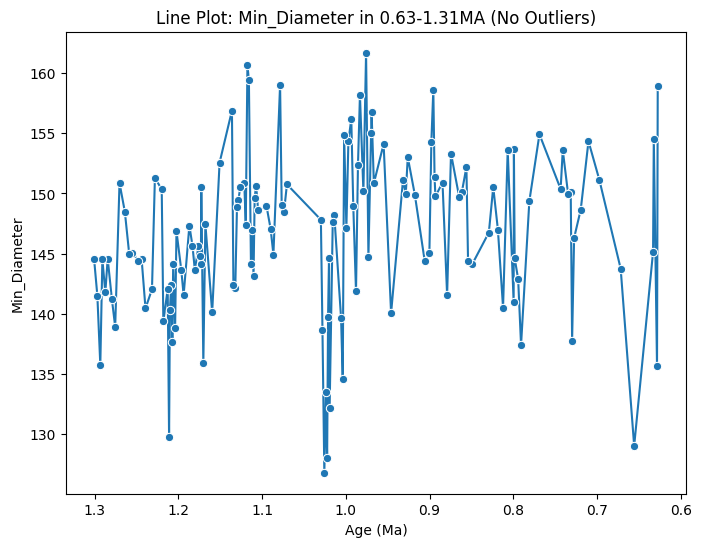

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

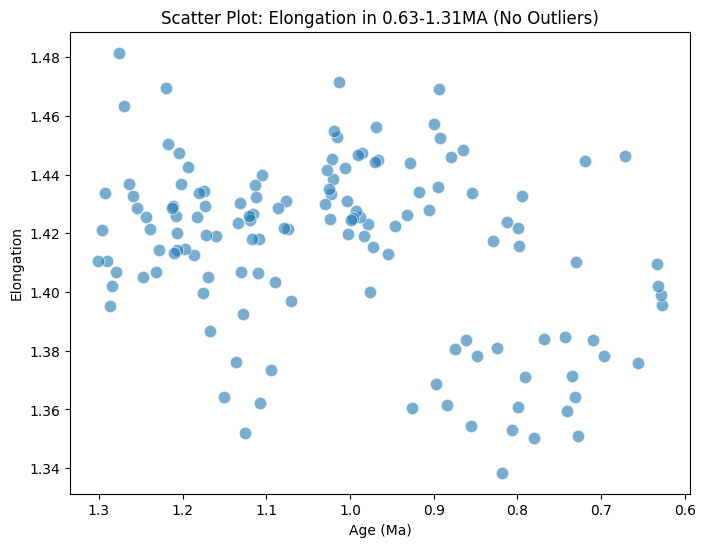

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

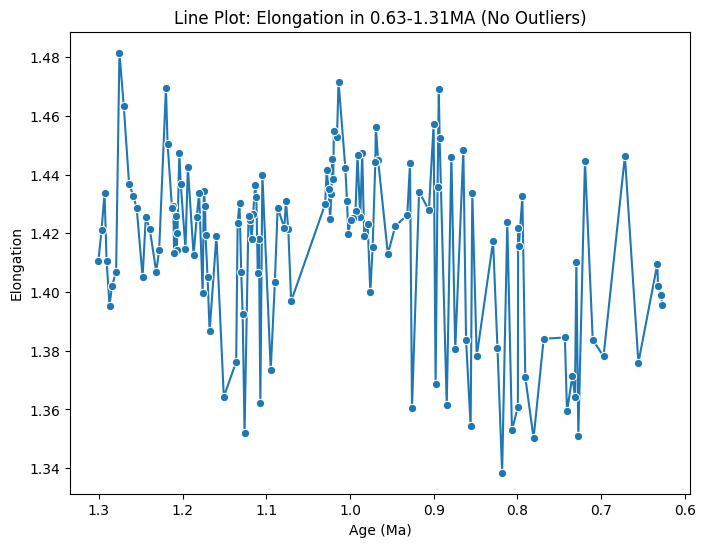

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

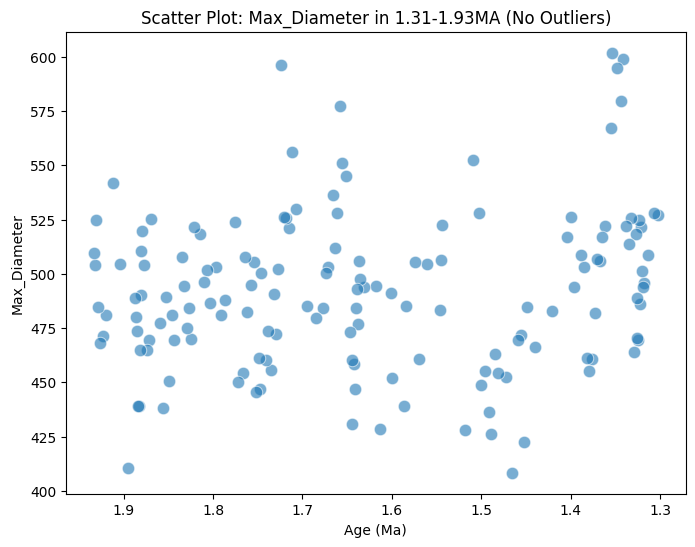

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

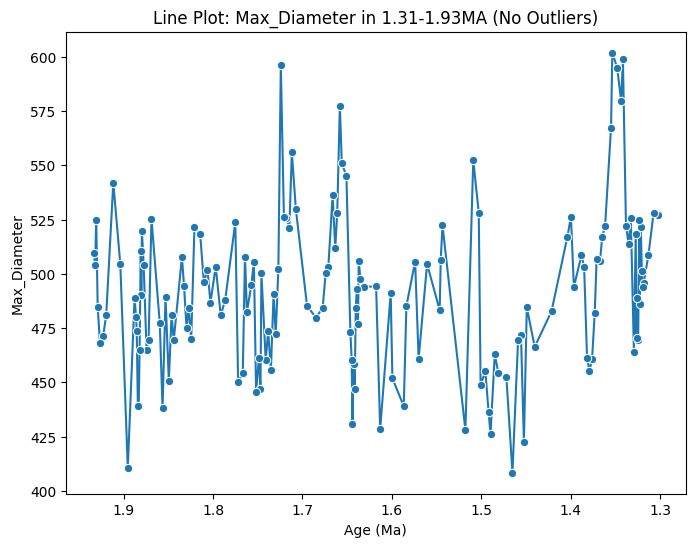

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

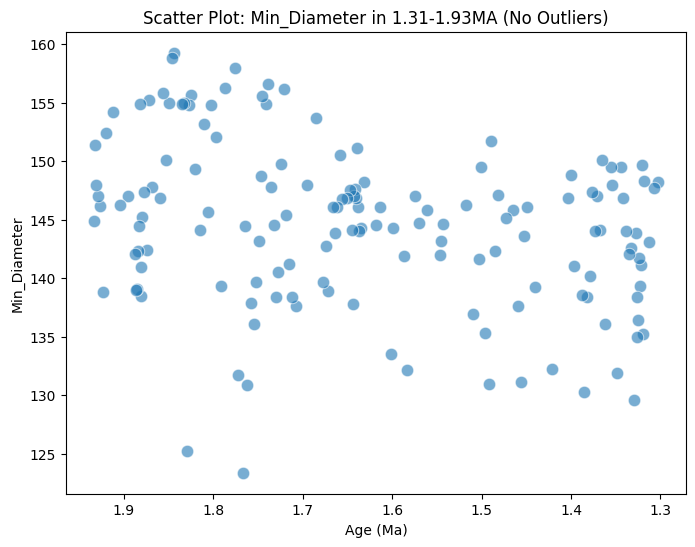

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

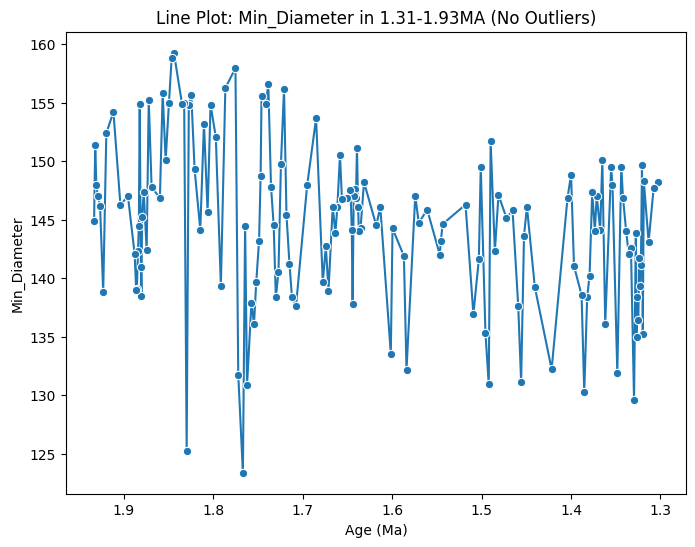

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

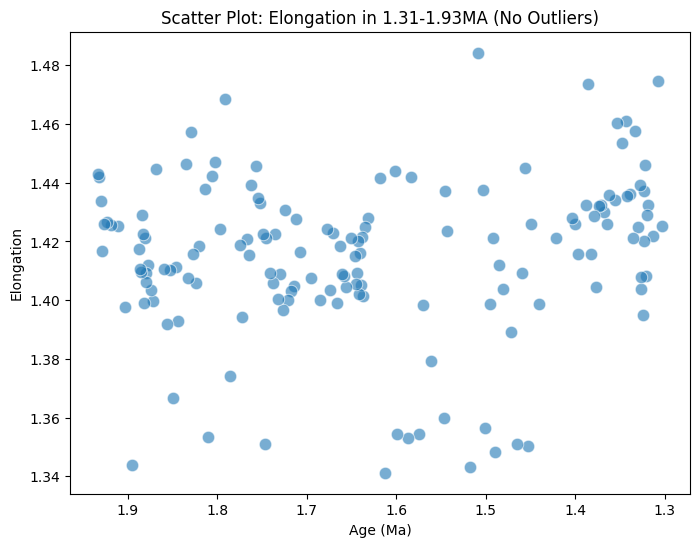

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

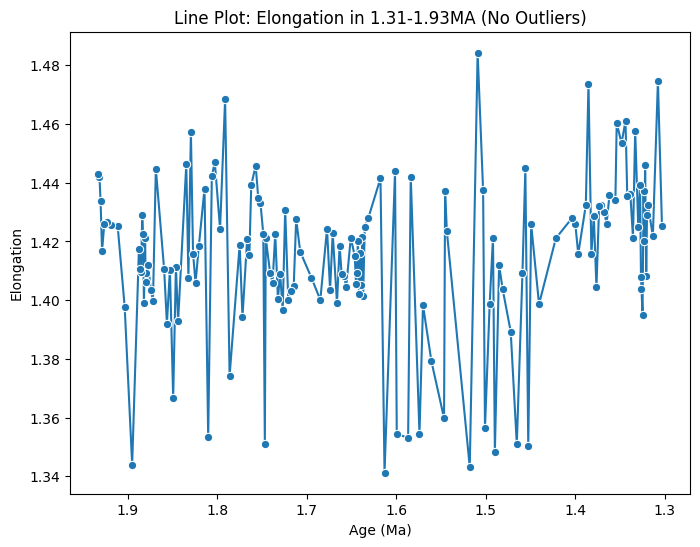

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

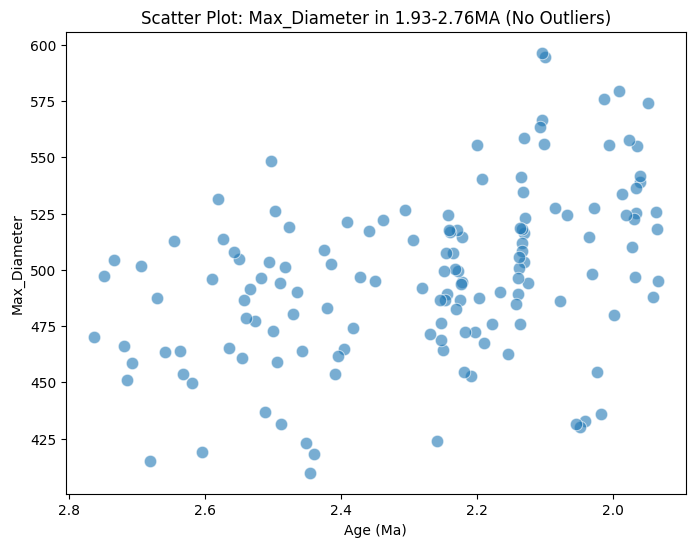

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

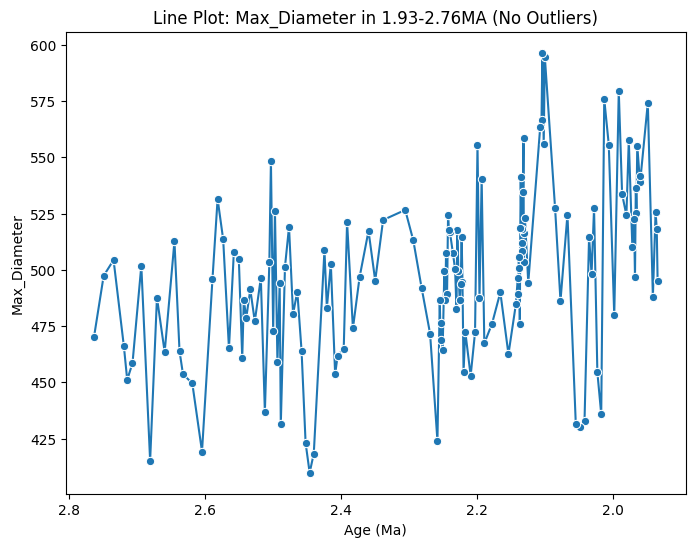

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

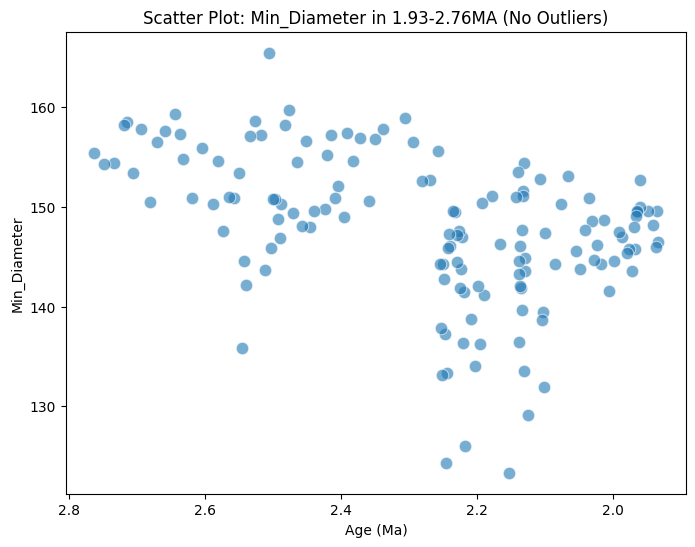

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

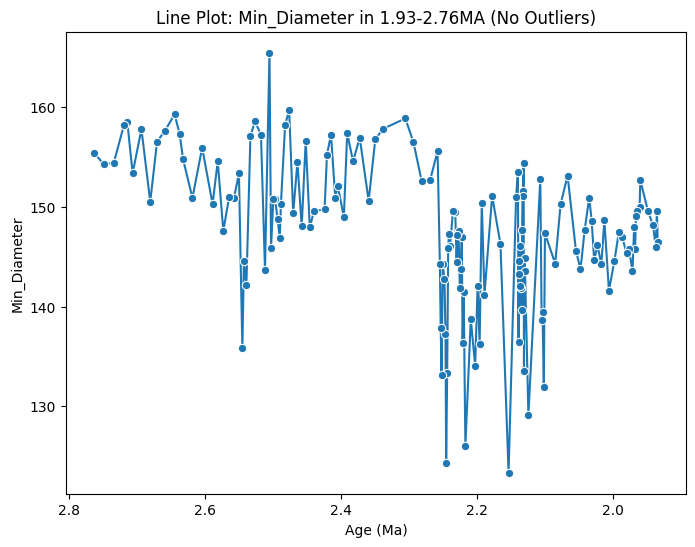

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

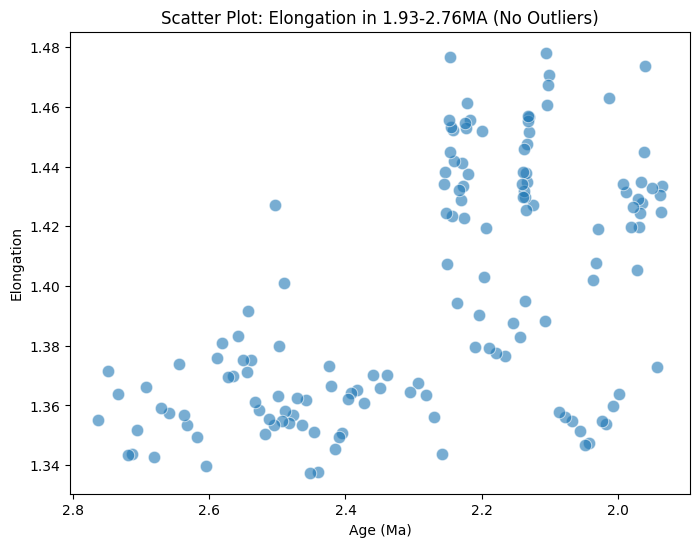

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

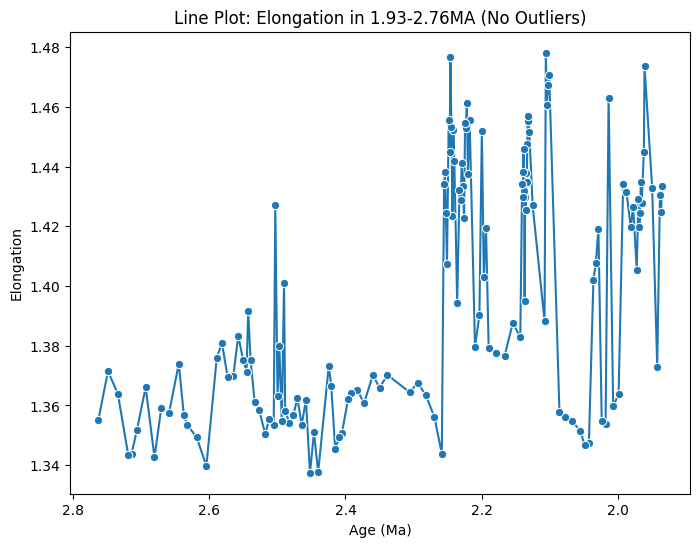

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

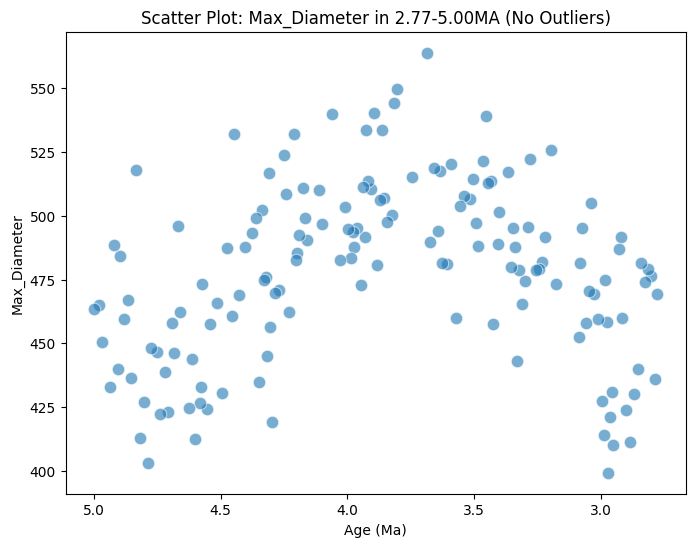

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

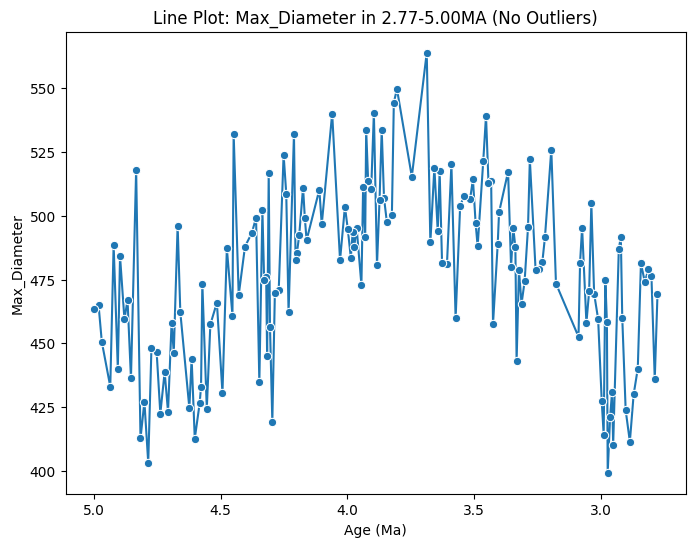

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

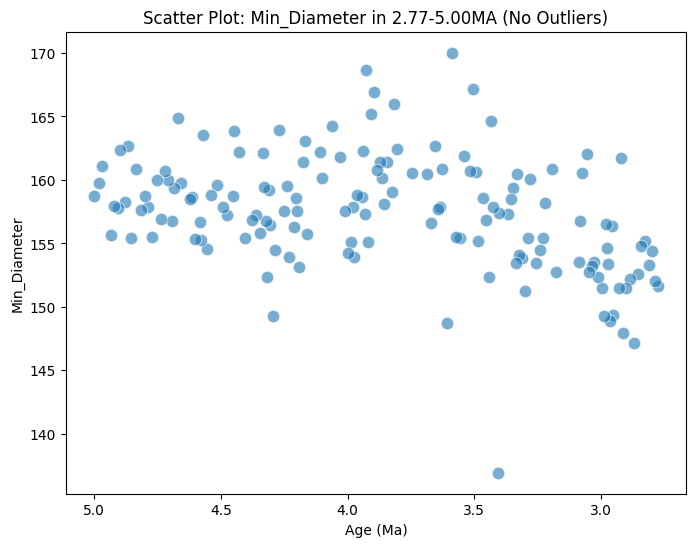

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

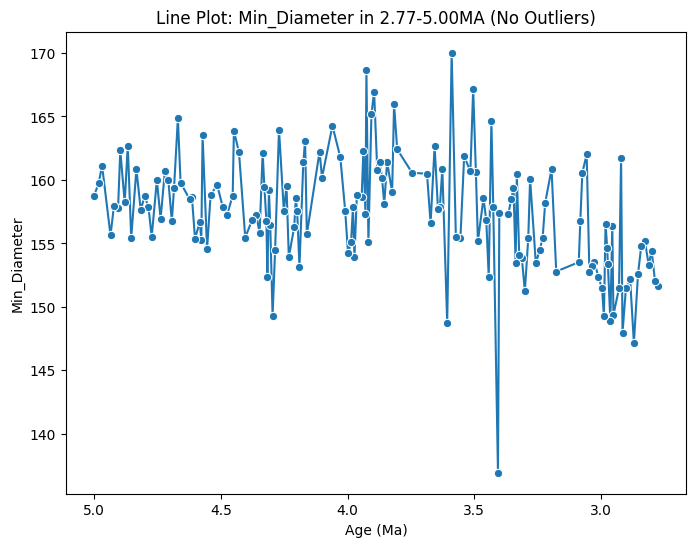

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

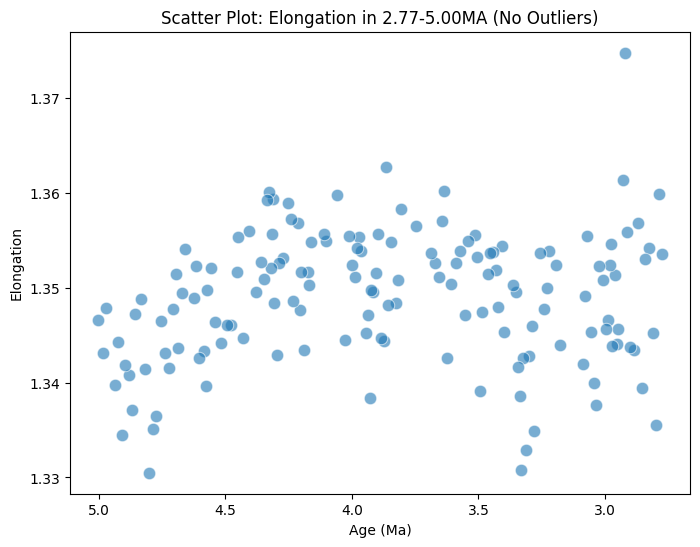

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

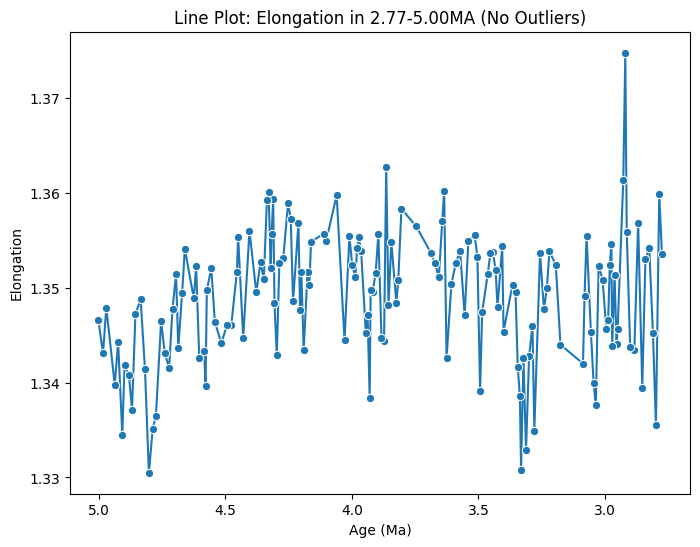

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

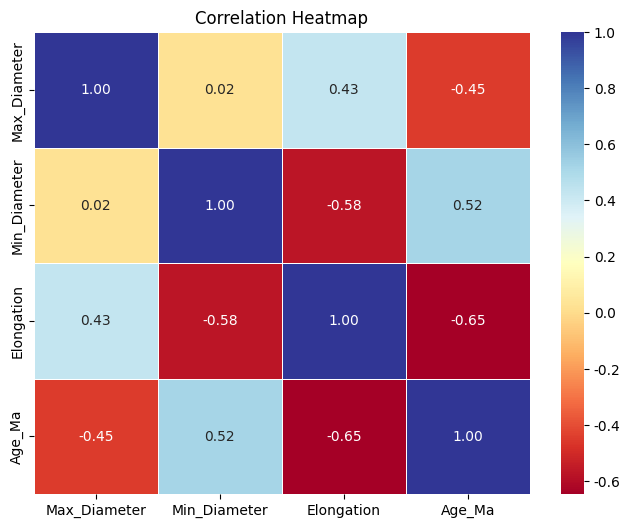

In [13]:
for feature in selected_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cleaned_data , x="Age_Group", y=feature, 
                order=["0.01-0.62MA", "0.63-1.31MA", "1.31-1.93MA", "1.93-2.76MA", "2.77-5.00MA"])
    plt.title(f"Box Plot: {feature} Across Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel(feature)
    plt.savefig(f"{save_path}BoxPlot_{feature}.png", dpi=300)
    plt.show()

for age_group in cleaned_data["Age_Group"].unique():
    df_group = cleaned_data[cleaned_data["Age_Group"] == age_group]

    for feature in selected_cols:
        # 🔹 散点图
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_group, x="Age_Ma", y=feature, alpha=0.6, s=80)
        plt.title(f"Scatter Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()  
        plt.savefig(f"{save_path}Scatter_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()

        # 🔹 折线图
        plt.figure(figsize=(8, 6))
        sns.lineplot(data=df_group, x="Age_Ma", y=feature, marker="o")
        plt.title(f"Line Plot: {feature} in {age_group} (No Outliers)")
        plt.xlabel("Age (Ma)")
        plt.ylabel(feature)
        plt.gca().invert_xaxis()  
        plt.savefig(f"{save_path}Line_{age_group}_{feature}_NoOutliers.png", dpi=300)
        plt.show()


df_sorted[selected_cols + ["Age_Ma"]] = df_sorted[selected_cols + ["Age_Ma"]].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_sorted[selected_cols + ["Age_Ma"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig(f"{save_path}Correlation_Heatmap.png", dpi=300)
plt.show()